# Linear regression

**date**
: 2021-04-18

**data**
: `cholesterol.csv`

**modules**
: `sklearn.linear_model`, `yellowbrick.regressor.ResidualsPlot`


**ref**
: Computer book C, activity 3

**desc**
: Linear regression in Python with `sklearn` and `yellowbrick`.

## Import the modules

In [1]:
import src.load
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot
import numpy as np
from scipy.stats import probplot
import seaborn as sns
import matplotlib.pyplot as plt

## Import the Data

In [2]:
sample = src.load.cholesterol()

In [3]:
sample.head()

,Cholesterol,Age
0,3.8,43
1,3.5,46
2,4.2,48
3,4.0,49
4,3.3,50


## Introduction

The sample contains data on the total cholesterol levels measured for 11 individuals aged over 40 years.

Estimate the least squares line for the sample and check the assumptions of the model.

## Analysis

### Create the model

In [4]:
# x=Age, y=Cholesterol to arrays
x = sample["Age"].to_numpy()
# reshape X=age to 2D array
x = x.reshape(-1, 1)
# no need to reshape the dependant
y = sample["Cholesterol"].to_numpy()

In [5]:
# create the model
regr = LinearRegression().fit(x, y)

Output the the coefficients of the model.

In [6]:
print(f"intercept: {regr.intercept_}")
print(f"slope: {regr.coef_}")

intercept: 1.8889519876097078
slope: [0.04073309]


It suggests the model is $y \simeq 1.889 + 0.041 x$.
Visualise the model by overlaying a line plot on top of a scatterplot.

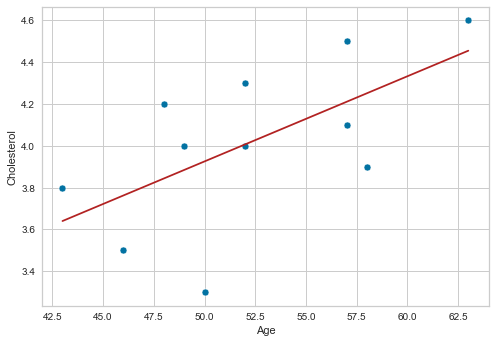

In [7]:
# make the predictions using the model
y_pred = regr.predict(x)

f, ax = plt.subplots()
ax= sns.scatterplot(
    data=sample,
    x="Age",
    y="Cholesterol"
)
ax = sns.lineplot(
    x=sample["Age"],
    y=y_pred,
    color="firebrick"
)
plt.show()

### Plot the residuals

We can use `yellowbrick.regressor.ResidualsPlot` to plot the residuals.

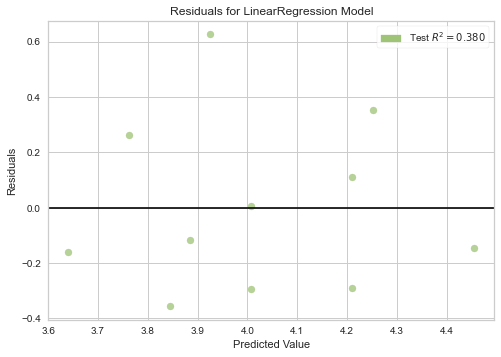

In [8]:
visualizer = ResidualsPlot(regr, hist=False)
visualizer.score(x, y)  # Evaluate the model on the test data
visualizer.show()
plt.show()

### Plot a normal probability plot

First calculate the residuals.

In [9]:
# calculate residuals
res = y - y_pred

Use `scipy.stats.probplot` to plot the normal probability plot.

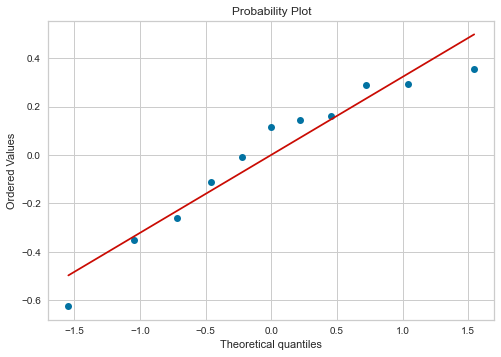

In [10]:
f, ax = plt.subplots()
ax = probplot(
    x=res,
    plot=ax
)
plt.show()